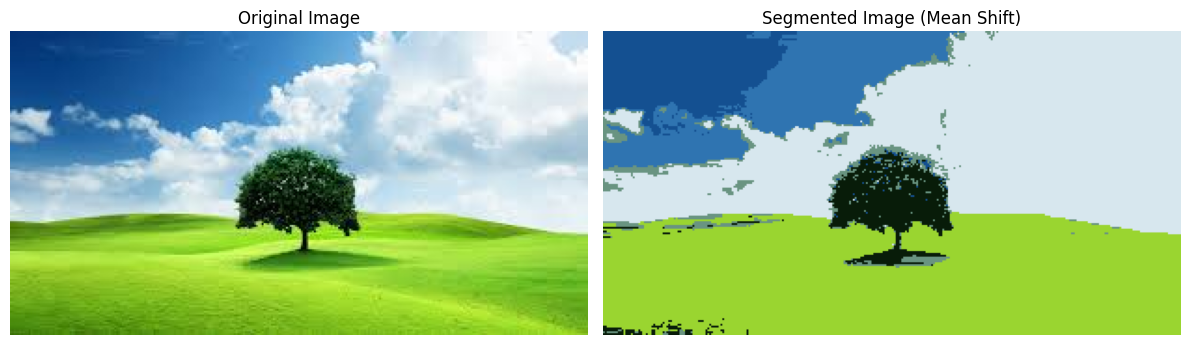

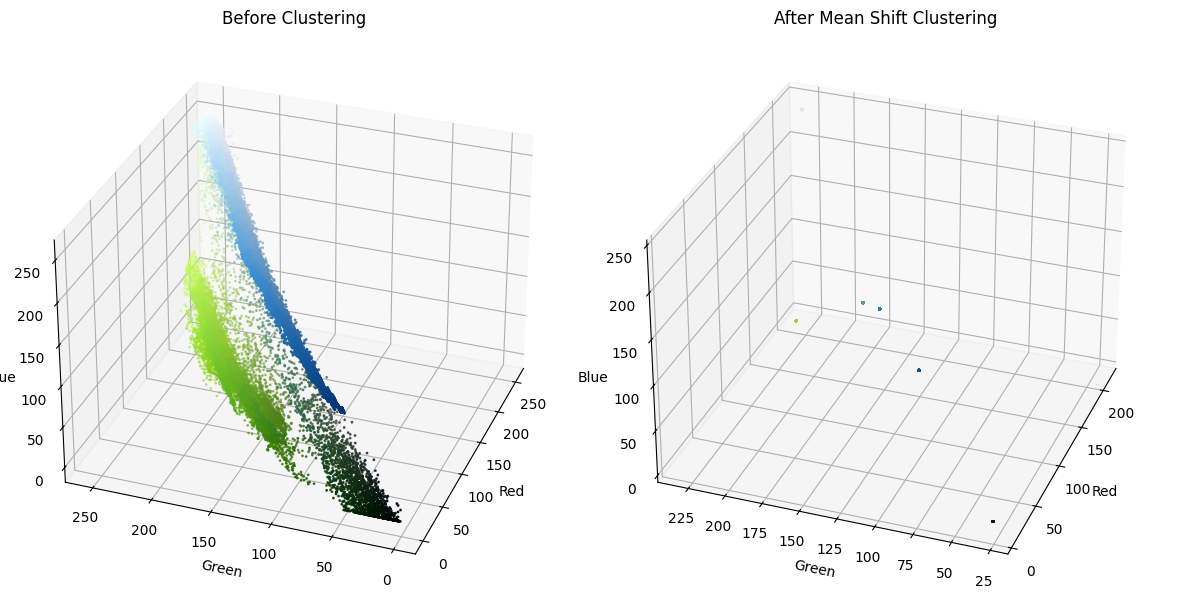

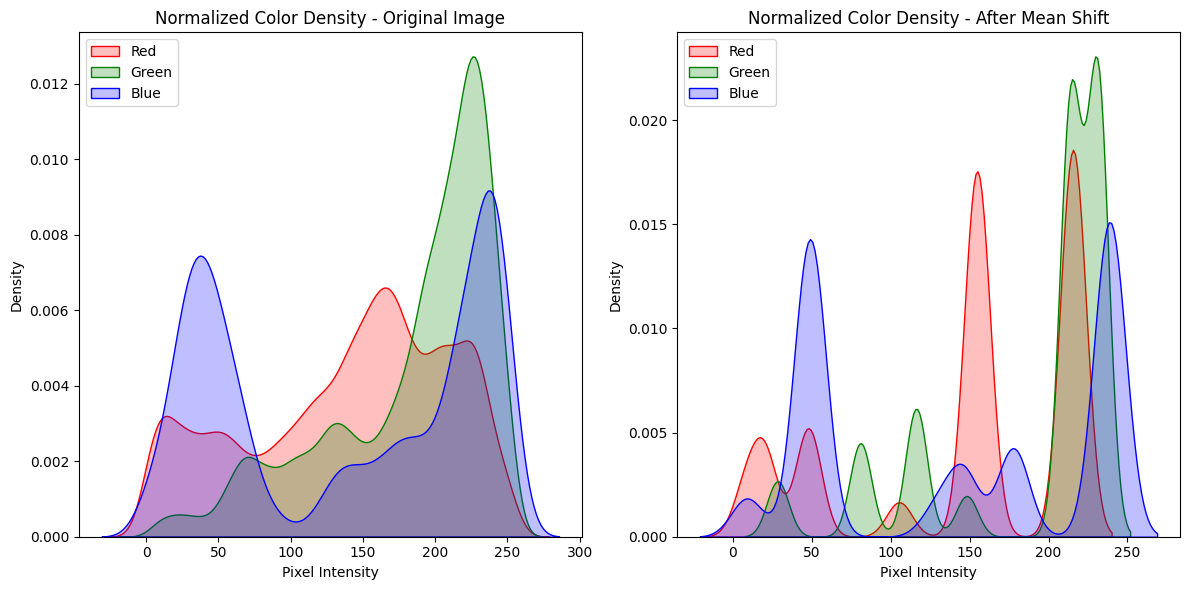

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd

# --------------------
# Step 1: Load and preprocess image
# --------------------
image = cv2.imread('segment.jpeg')  # Your image path
small_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
flat_image = small_image.reshape((-1, 3))

# --------------------
# Step 2: Mean Shift Clustering
# --------------------
bandwidth = estimate_bandwidth(flat_image, quantile=0.1, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(flat_image)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
segmented_image = cluster_centers[labels].reshape(small_image.shape).astype(np.uint8)

# --------------------
# Step 3: Display original and segmented images
# --------------------
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(small_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title("Segmented Image (Mean Shift)")
plt.axis('off')
plt.tight_layout()
plt.show()

# --------------------
# Step 4: 3D RGB Pixel Distribution (Before & After)
# --------------------
fig = plt.figure(figsize=(12, 6))

# Before Clustering
ax = fig.add_subplot(121, projection='3d')
r, g, b = flat_image[:, 0], flat_image[:, 1], flat_image[:, 2]
ax.scatter(r, g, b, c=flat_image / 255.0, s=1)
ax.set_title("Before Clustering")
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
ax.view_init(30, 200)

# After Clustering
ax = fig.add_subplot(122, projection='3d')
seg_flat = cluster_centers[labels]
r, g, b = seg_flat[:, 0], seg_flat[:, 1], seg_flat[:, 2]
ax.scatter(r, g, b, c=seg_flat / 255.0, s=1)
ax.set_title("After Mean Shift Clustering")
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
ax.view_init(30, 200)

plt.tight_layout()
plt.show()

# --------------------
# Step 5: Normalized Density Plots (Before & After)
# --------------------
df_original = pd.DataFrame(flat_image, columns=['R', 'G', 'B'])
df_segmented = pd.DataFrame(seg_flat, columns=['R', 'G', 'B'])

plt.figure(figsize=(12, 6))

# Original
plt.subplot(1, 2, 1)
sns.kdeplot(data=df_original, x='R', fill=True, color='red', label='Red')
sns.kdeplot(data=df_original, x='G', fill=True, color='green', label='Green')
sns.kdeplot(data=df_original, x='B', fill=True, color='blue', label='Blue')
plt.title("Normalized Color Density - Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Density")
plt.legend()

# Segmented
plt.subplot(1, 2, 2)
sns.kdeplot(data=df_segmented, x='R', fill=True, color='red', label='Red')
sns.kdeplot(data=df_segmented, x='G', fill=True, color='green', label='Green')
sns.kdeplot(data=df_segmented, x='B', fill=True, color='blue', label='Blue')
plt.title("Normalized Color Density - After Mean Shift")
plt.xlabel("Pixel Intensity")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()